In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Baca dataset

In [ ]:
p = "/content/drive/MyDrive/Kuliah/Semester 6/UAS/Dataset/Company Bankruptcy Prediction/data.csv"
# p = "data.csv"
df = pd.read_csv(p)

Bagi dataset menjadi Kelas dan Fitur

In [ ]:
#kelas
y = df.loc[:,['Bankrupt?']].values

#fitur
fitur = [" ROA(C) before interest and depreciation before interest",
       " ROA(A) before interest and % after tax",
       " ROA(B) before interest and depreciation after tax",
       " Operating Gross Margin", " Realized Sales Gross Margin",
       " Operating Profit Rate", " Pre-tax net Interest Rate",
       " After-tax net Interest Rate",
       " Non-industry income and expenditure/revenue",
       " Continuous interest rate (after tax)", " Operating Expense Rate",
       " Research and development expense rate", " Cash flow rate",
       " Interest-bearing debt interest rate", " Tax rate (A)",
       " Net Value Per Share (B)", " Net Value Per Share (A)",
       " Net Value Per Share (C)", " Persistent EPS in the Last Four Seasons",
       " Cash Flow Per Share", " Revenue Per Share (Yuan ¥)",
       " Operating Profit Per Share (Yuan ¥)",
       " Per Share Net profit before tax (Yuan ¥)",
       " Realized Sales Gross Profit Growth Rate",
       " Operating Profit Growth Rate", " After-tax Net Profit Growth Rate",
       " Regular Net Profit Growth Rate", " Continuous Net Profit Growth Rate",
       " Total Asset Growth Rate", " Net Value Growth Rate",
       " Total Asset Return Growth Rate Ratio", " Cash Reinvestment %",
       " Current Ratio", " Quick Ratio", " Interest Expense Ratio",
       " Total debt/Total net worth", " Debt ratio %", " Net worth/Assets",
       " Long-term fund suitability ratio (A)", " Borrowing dependency",
       " Contingent liabilities/Net worth",
       " Operating profit/Paid-in capital",
       " Net profit before tax/Paid-in capital",
       " Inventory and accounts receivable/Net value", " Total Asset Turnover",
       " Accounts Receivable Turnover", " Average Collection Days",
       " Inventory Turnover Rate (times)", " Fixed Assets Turnover Frequency",
       " Net Worth Turnover Rate (times)", " Revenue per person",
       " Operating profit per person", " Allocation rate per person",
       " Working Capital to Total Assets", " Quick Assets/Total Assets",
       " Current Assets/Total Assets", " Cash/Total Assets",
       " Quick Assets/Current Liability", " Cash/Current Liability",
       " Current Liability to Assets", " Operating Funds to Liability",
       " Inventory/Working Capital", " Inventory/Current Liability",
       " Current Liabilities/Liability", " Working Capital/Equity",
       " Current Liabilities/Equity", " Long-term Liability to Current Assets",
       " Retained Earnings to Total Assets", " Total income/Total expense",
       " Total expense/Assets", " Current Asset Turnover Rate",
       " Quick Asset Turnover Rate", " Working capitcal Turnover Rate",
       " Cash Turnover Rate", " Cash Flow to Sales", " Fixed Assets to Assets",
       " Current Liability to Liability", " Current Liability to Equity",
       " Equity to Long-term Liability", " Cash Flow to Total Assets",
       " Cash Flow to Liability", " CFO to Assets", " Cash Flow to Equity",
       " Current Liability to Current Assets", " Liability-Assets Flag",
       " Net Income to Total Assets", " Total assets to GNP price",
       " No-credit Interval", " Gross Profit to Sales",
       " Net Income to Stockholder's Equity", " Liability to Equity",
       " Degree of Financial Leverage (DFL)",
       " Interest Coverage Ratio (Interest expense to EBIT)",
       " Net Income Flag", " Equity to Liability"]

X = df.loc[:, fitur].values

Cek Missing Value

In [ ]:
#cek missingvalue dataframe
df.isnull().sum().sum()
# df.isnull().sum()
# print(df.isnull().sum().sum())

0

Normalisasi

In [ ]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [ ]:
print(X)
X_dataframe = pd.DataFrame(X)
X_dataframe

[[0.37059426 0.42438945 0.40574977 ... 0.56405011 0.         0.01646874]
 [0.46429094 0.53821413 0.51673002 ... 0.57017495 0.         0.02079431]
 [0.42607127 0.49901875 0.47229509 ... 0.56370608 0.         0.01647411]
 ...
 [0.47272461 0.533744   0.52063815 ... 0.5651584  0.         0.09764874]
 [0.50626432 0.5599106  0.55404465 ... 0.56530151 0.         0.04400945]
 [0.49305319 0.57010467 0.54954762 ... 0.56516694 0.         0.23390224]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000e+00,0.458143,7.323965e-13,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,0.390284,...,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,4.580000e-02,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000e+00,0.461867,6.536007e-13,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,0.376760,...,0.182419,0.014948,4.689376e-13,1.434104e-13,0.056963,0.341106,0.289642,5.256995e-13,0.308589,0.731975,0.329740,2.510149e-12,0.931065,0.002226,0.025516,1.065198e-14,7.700000e-01,0.593916,2.490000e-01,0.671570,5.634953e-11,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.0,0.795297,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.0,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.363661e-14,2.555110e-03,0.458521,7.980596e-13,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,1.968215e-12,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,0.728729,4.248932e-14,0.264184,0.368913,4.197292e-12,5.793673e-13,0.629631,2.137594e-12,0.207516,0.792484,0.005100,0.379093,...,0.602806,0.000991,7.145671e-13,5.533679e-01,0.098162,0.336731,0.277456,1.400483e-12,0.446027,0.742729,0.334777,3.894251e-13,0.909903,0.002060,0.021387,1.791094e-13,1.022676e-13,0.594502,7.610000e-02,0.671571,3.319462e-11,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0.0,0.774670,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.0,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.079968e-14,0.000000e+00,0.465705,4.535807e-13,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,4.757771e-12,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,0.488488,4.098884e-14,0.263371,0.384077,1.525112e-12,3.138127e-13,0.630228,9.630183e-13,0.151465,0.848535,0.005047,0.379743,...,0.225815,0.018851,3.357412e-13,1.047302e-13,0.098715,0.348716,0.276580,3.572299e-13,0.615848,0.729825,0.331509,2.323396e-12,0.906902,0.001831,0.024161,8.140000e-01,6.050000e-01,0.593889,2.030000e-01,0.671519,6.720480e-11,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0.0,0.739555,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.0,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.897898e-01,0.000000e+00,0.462746,6.929986e-13,0.000000,0.167502,0.167502,0.167502,0.212537,0.319162,9.831057e-12,0.096898,0.168412,0.022096,0.848258,0.689697,0.689697,0.217626,0.551552,4.704690e-14,0.265218,0.379690,2.189980e-12,4.038404e-13,0.636055,5.180684e-13,0.106509,0.893491,0.005303,0.375025,...,0.358380,0.014161,4.846679e-13,7.051436e-14,0.110195,0.344639,0.287913,4.912785e-13,0.975007,0.732000,0.330726,0.000000e+00,0.913850,0.002224,0.026385,6.680000e-01,5.050000e-01,0.593915,8.240000e-02,0.671563,3.720612e-11,0.975007,0

Split Dataset menjadi data training dan data testing

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2) #80% training dan 20% testing

Proses PCA

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

In [ ]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.389698,-0.196544,-0.061993,-0.341714,-0.205487,-0.155309,-0.181974,-0.250419,-0.271058,-0.290549
1,0.481681,-0.773313,0.618697,0.084185,-0.366930,-0.109342,-0.083648,0.010470,-0.413458,0.082511
2,-0.071018,-0.412986,-0.337838,-0.074583,0.048953,-0.203020,-0.210611,0.009771,-0.129327,0.166156
3,0.685777,-0.602494,0.343644,-0.228268,-0.484178,-0.132216,-0.056839,0.082115,0.763171,0.180516
4,0.620666,0.494069,-0.207719,0.189122,-0.247582,-0.154526,-0.074669,0.060977,0.257795,-0.372660
...,...,...,...,...,...,...,...,...,...,...
6814,-0.274150,-0.064005,-0.202143,-0.149684,0.168463,-0.199465,0.203945,-0.021964,-0.096028,-0.183629
6815,-0.087149,-0.136130,0.601881,0.650484,0.074065,0.418468,-0.137672,0.192984,0.119567,-0.122493
6816,-0.252306,-0.133870,-0.331603,-0.129220,-0.041115,-0.231741,-0.149012,0.154774,-0.277667,0.187276
6817,-0.394147,-0.092358,0.160140,0.040519,-0.016016,-0.261888,0.068668,0.032757,0.020108,-0.188401


In [ ]:
var_pca = pca.explained_variance_ratio_

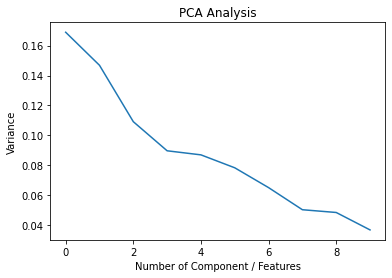

In [ ]:
plt.xlabel('Number of Component / Features')
plt.ylabel('Variance')
plt.title('PCA Analysis')
plt.plot(var_pca)

Buat Model

In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier
clsf = MLPClassifier(activation='logistic',solver='lbfgs',alpha=1e-5,
                     hidden_layer_sizes=(64,32,32,16),random_state=0,max_iter=1000)
clsf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 32, 32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#akurasi
from sklearn.metrics import accuracy_score
ymodel = clsf.predict(X_train)
prediksi = clsf.predict(X_test)
print("Akurasi dengan MLP Classifier: ",accuracy_score(y_test,prediksi), "\n")

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix: \n",confusion_matrix(y_test,prediksi), "\n")
print("Classificaiton Report: \n", classification_report(y_test,prediksi))


Akurasi dengan MLP Classifier:  0.9721407624633431 

Confusion Matrix: 
 [[1326    0]
 [  38    0]] 

Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1326
           1       0.00      0.00      0.00        38

    accuracy                           0.97      1364
   macro avg       0.49      0.50      0.49      1364
weighted avg       0.95      0.97      0.96      1364



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dengan Library Tensorflow

Menggunakan Callback

In [ ]:
#buat kelas callback untuk mempercepat proses tuning
class myCallback(tf.keras.callbacks.Callback ):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

Buat Model (tensorflow)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(16, activation="relu"),
                            #  tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="Adam", loss='binary_crossentropy',metrics=['accuracy'])

Fit model

In [ ]:
model.fit(X_train, y_train, 
          epochs=100, batch_size=128, 
          callbacks=[callbacks],
          verbose=1
          )

Epoch 1/100
43/43 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.9017
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9676
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9676
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9676
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9676
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9676
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9676
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9676
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9676
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9681
Epoch 11/

In [ ]:
# ymodel = model.predict(X_train)
# prediksi = model.predict(X_test)

# # ymodel
# # prediksi

Evaluasi model dengan data test

In [ ]:
error, accuracy = model.evaluate(X_test, y_test)
print("error: ", error)
print("accuracy: ", accuracy)

43/43 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9685
error:  0.11996307969093323
accuracy:  0.9684750437736511
